In [ ]:
import cv2
from tqdm import tqdm, trange
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sn
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.models import Model
import tensorflow as tf 
from tensorflow.keras.applications import *
import matplotlib.pyplot as plt

In [ ]:
witdh = 224
height = 224
batch_size = 32
classes = 5

In [ ]:
data_gen = ImageDataGenerator(validation_split= 0.15)

In [ ]:
train_gen = data_gen.flow_from_directory('/content/drive/MyDrive/data_project_v2/gaussian_filtered_images/gaussian_filtered_images', 
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         target_size=(witdh, height),
                                         subset = "training",
                                         shuffle = True)
valid_gen = data_gen.flow_from_directory('/content/drive/MyDrive/data_project_v2/gaussian_filtered_images/gaussian_filtered_images', 
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         target_size=(witdh, height),
                                         subset = "validation",
                                         shuffle = True)

Found 3116 images belonging to 5 classes.
Found 546 images belonging to 5 classes.


In [ ]:
model_efficientNet = tf.keras.applications.EfficientNetB4(include_top= False, weights= "imagenet", input_shape= (224,224,3))
model = Sequential()
model.add(model_efficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(5, activation = "sigmoid"))


71696384/71686520 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Model_project/EfficientNetB4_MODEL2.h5"

rd = ReduceLROnPlateau(monitor='val_loss', 
                       factor = 0.1, 
                       patience = 3, 
                       min_lr = 0.0000001) #giảm lr nếu ko cải thiện

es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   verbose = 1, 
                   patience=10) #dừng model nếu ko cải thiện
                   
mc = ModelCheckpoint(checkpoint_path, 
                     monitor='val_accuracy', 
                     mode='max', 
                     save_best_only=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
history = model.fit(train_gen,
          validation_data= valid_gen,
          epochs = 100,
          verbose = 1,
          callbacks = [mc,es,rd])

Epoch 1/100
98/98 [==============================] - 1122s 11s/step - loss: 0.7494 - accuracy: 0.7320 - val_loss: 1.0098 - val_accuracy: 0.6722 - lr: 0.0010
Epoch 2/100
98/98 [==============================] - 79s 805ms/step - loss: 0.5213 - accuracy: 0.8039 - val_loss: 0.9644 - val_accuracy: 0.7399 - lr: 0.0010
Epoch 3/100
98/98 [==============================] - 81s 825ms/step - loss: 0.4249 - accuracy: 0.8373 - val_loss: 0.9015 - val_accuracy: 0.7418 - lr: 0.0010
Epoch 4/100
98/98 [==============================] - 81s 823ms/step - loss: 0.3625 - accuracy: 0.8681 - val_loss: 0.8392 - val_accuracy: 0.7473 - lr: 0.0010
Epoch 5/100
98/98 [==============================] - 77s 787ms/step - loss: 0.2629 - accuracy: 0.9053 - val_loss: 0.9214 - val_accuracy: 0.7234 - lr: 0.0010
Epoch 6/100
98/98 [==============================] - 80s 821ms/step - loss: 0.2385 - accuracy: 0.9220 - val_loss: 0.7844 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 7/100
98/98 [==============================] - 81s 8

TEST

In [ ]:
model = load_model("/content/drive/MyDrive/Model_project/EfficientNetB4_MODEL2.h5")

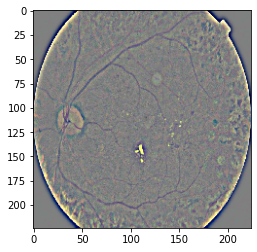

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img


img = load_img('/content/drive/MyDrive/data_project_v2/07122e268a1d.jpg', target_size=(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')

In [ ]:
b = np.argmax(model.predict(img), axis=-1)  
print(model.predict(img))
if b==0:
  print("mild")
elif b==1:
  print("moderate")
elif b == 2:
  print("no_DR")
elif b==3:
  print("proliferate_DR")
elif b==4:
  print("severe")

[[0.16742504 0.3013475  0.01570557 0.99966025 0.13186722]]
proliferate_DR


In [ ]:
score = model.evaluate(valid_gen,verbose=0)
print('Test loss: ',score[0])
print('test accuraccy',score[1])


Test loss:  0.7147262692451477
test accuraccy 0.8333333134651184


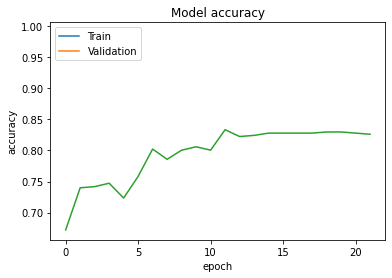

In [ ]:
plt.plot([history.history['accuracy']])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')